# 🖼️ **Quick Image Classifier**

[Notebook link ](https://colab.research.google.com/drive/1nomXhuGzUAXPUL2mo8v6-B5o9T6upS-Y?usp=sharing)
Drop in any image — this tiny tool will scan it and tell you *what it is* using a pretrained **ResNet50** model from PyTorch. No setup, no hassle. Just run the cells , upload , and get the top guess + confidence level. 🧠🔍

Model trained on **ImageNet**, so it's got knowledge on over 1,000 everyday things.

---

### ⚠️ **Heads Up:**

**You must upload an image first** 🖼️ — then give it a few seconds ⏳ to process.

Upload, predict, done. 🎯


In [1]:
!pip install -q torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.2 MB/s eta 0:00:00


In [2]:
# all the imports
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import json
import urllib.request

# Load pretrained model (ResNet50) this gone be the ai model responsible for classification
model = models.resnet50(pretrained=True)
model.eval()


preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]


Saving Untitled.jpg to Untitled.jpg


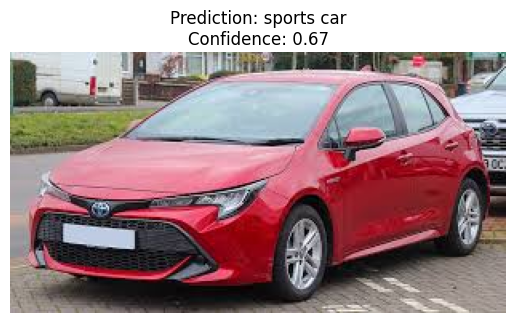

In [5]:
# this code gone let you upload an image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the image
img = Image.open(filename).convert('RGB')
input_tensor = preprocess(img).unsqueeze(0)


with torch.no_grad():
    output = model(input_tensor)
    probs = torch.nn.functional.softmax(output[0], dim=0)


# Download label map
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = urllib.request.urlopen(LABELS_URL).read().decode("utf-8").splitlines()

# Get best prediction it may not do perfect but i works
pred_class = labels[probs.argmax()]
confidence = probs.max().item()

# Show  the output
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {pred_class}\nConfidence: {confidence:.2f}')
plt.show()